# Assignment Jan 2021. Wells along a river in a closed valley
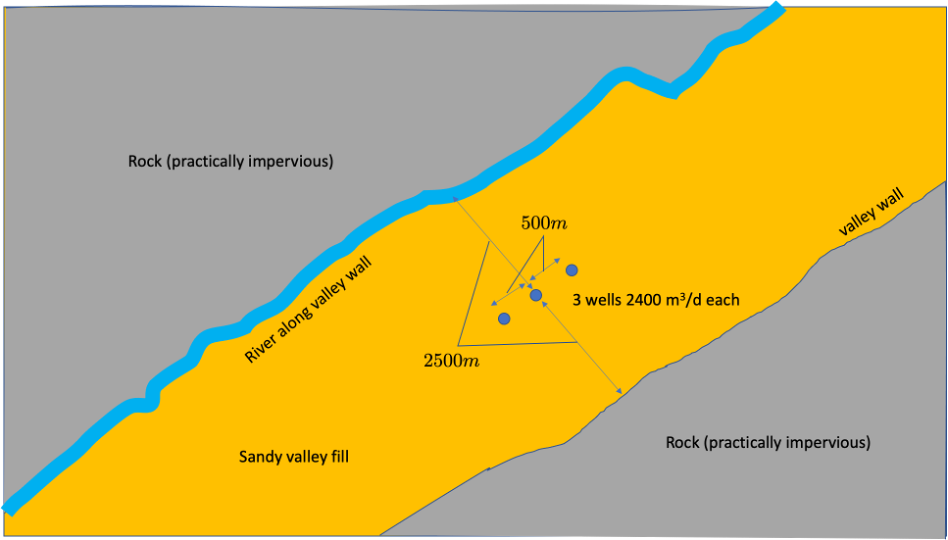
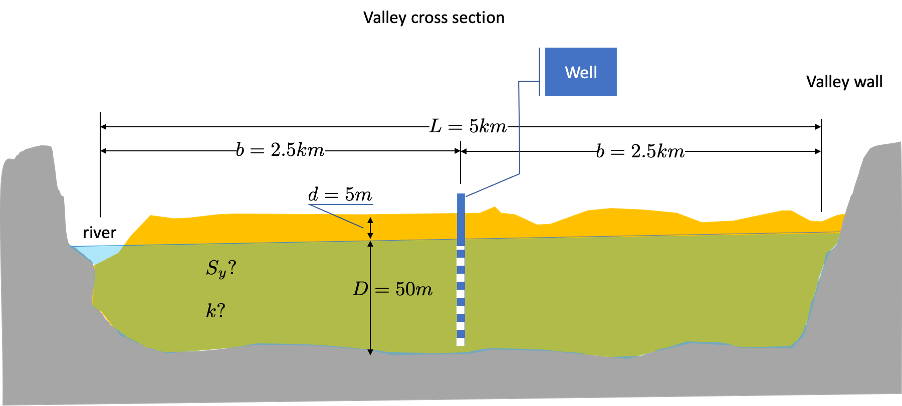


:author: prof. dr.ir. T.N. Olsthoorn Jan 30, 2021

## Problem statement

A groundwater extraction station with three wells is to be realized in a very long, 5 km wide, almost straight valley. The valley is bounded by bedrock while the sediments below the water table can be considered a 50 m thick, layer of sand on top of pratically impervious material. As shown in the cross section of  Figure 1, a river, that may be considered fully penetrating and in direct contact with the aquifer, flows along one of the valley walls. The water table is 5 m below ground surface at the center line of the valley, where the wells are to be installed. As is shown on the map in Figure 2, the three wells will be placed 500 m apart along the center line of the valley. Each well will pump 2400 m3/d.

![afbeelding1](../pictures/AssJan2021_1.png)

*Figure 1 Cross section through the valley*

One pumping well and three observation wells were installed first, and a pumping test was done on it to determine the aquifer properties, i.e. its transmissivity kD and its storage coefficient, i.e. its specific yield Sy. The pumping lasted for 1 montsh (30 days) at a rate of 600 m3/d. During this time, the heads in the well and in the piezometers were monitored from which the drawdown relative to the initial situation was determined. These darwdowns are  provided in a table in a accompanying spreadsheet. The header of the table shows at which distance from this well the observation wells were placed. These observation wells (also called piezometers) are not shown on the cross section and the map because they are too close to the well to be shown on this scale.

![afbeelding-2.png](../pictures/AssJan2021_2.png)
*Figure 2: Map of the valley with the final three well in place. The observation wells used in the pumping test are not shown as they are too close to the well for the scale of this map.*

Each student obtains a spreadsheet with unique the pumping-test data. You find the spreadsheet with your name in the folder on BBB named “Assignment”. 


## Assignment questions

1. With the drawdown data given in the accompanying spreadsheet, determine the aquifer properties kD and Sy.
1. How far out into the aquifer does the drawdown during the pumping test reach?
1. Is there during the pumping test an influence from the river and or the valley wall on the drawdowns?
1. What will be the development of the drawdown in the final 3 wells assuming they are fully penetrating and are not clogged?
1. Show the development of the drawdown along a line perpendicular to the valley axis through the center well.
1. Show the development of the drawdown along the valley axes through the 3 wells. 
1. Show the development of the inflow from the river into the aquifer due to the three wells.
1. Show the drawdown in a map after it has become steady srate.
1. What is the required depth of the pumps, given that the wells have an extra drawdown due to partial penetration and clogging which doubles the drawdown relative to the case of unclogged fully penetrating well and given that the top of the pump has to be at least 1.5 m below the water table in the well.

Tip: Set the computation up for a single arbitrary point first not worrying about superposition the results for many points (like along a line or in a map) and not worrying about superposition across the river and the valley wall. This can all be included step by step.


## Import the modules that we will need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # To deal with tables
from scipy.special import exp1 as W   # Theis well function

# A function for plotting with less typing
def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None, xscale=None, yscale=None, figsize=(12,8)):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim: ax.set_xlim(xlim)
    if ylim: ax.set_ylim(ylim)
    if xscale: ax.set_xscale(xscale)
    if yscale: ax.set_yscale(yscale)
    ax.grid()
    fig.set_size_inches(figsize)
    return ax


def set_fig_size(w=12, h=8):
    """Set the size of the current figure to width w and height h in inches."""
    fig = plt.gcf()
    fig.set_size_inches(w, h)

def revert_yaxis():
    ax = plt.gca()
    ax.set_ylim(ax.get_ylim()[::-1])


## Get and show our data (pumping test data)

In [2]:
file = 'AssJan2021ptest.xlsx'
pdata = pd.read_excel(file, index_col='days')
pdata

,r=0 m,r=11 m,r=27 m,r=38 m
days,,,,
0.001000,0.168736,-0.000487,0.000345,0.000009
0.001110,0.172052,-0.000463,0.000345,0.000004
0.001232,0.175369,-0.000424,0.000344,-0.000002
0.001367,0.178689,-0.000365,0.000343,-0.000009
0.001517,0.182010,-0.000278,0.000342,-0.000016
...,...,...,...,...
19.780054,0.483181,0.240285,0.191946,0.163338
21.950828,0.489292,0.240928,0.185193,0.162964
24.359836,0.493902,0.246910,0.195476,0.173337


In [3]:
r_pz = [0.25, 11, 27, 38]
times = np.asarray(pdata.index)

Plot the data in three different ways (linear scales, half-log scale and double-log scales). This is what you would normally do to inspect the data.

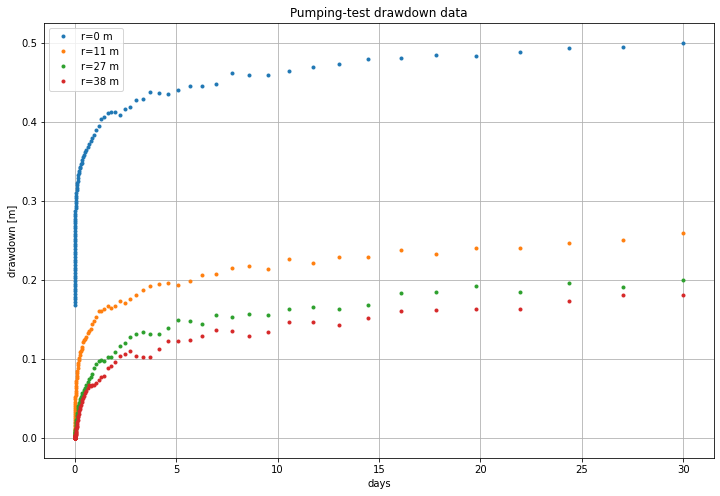

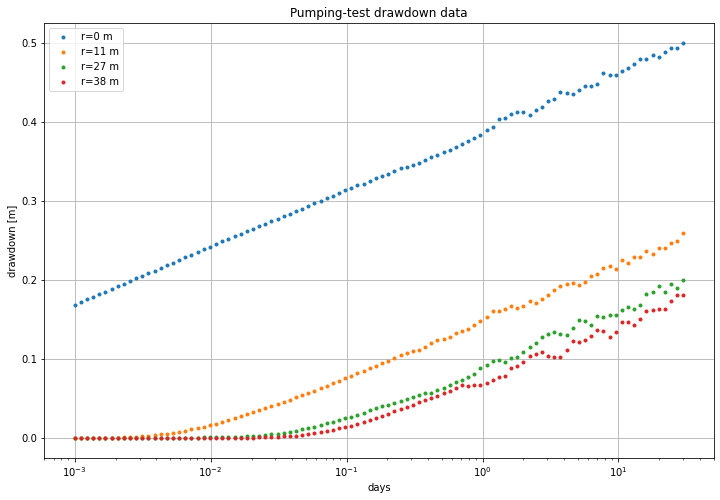

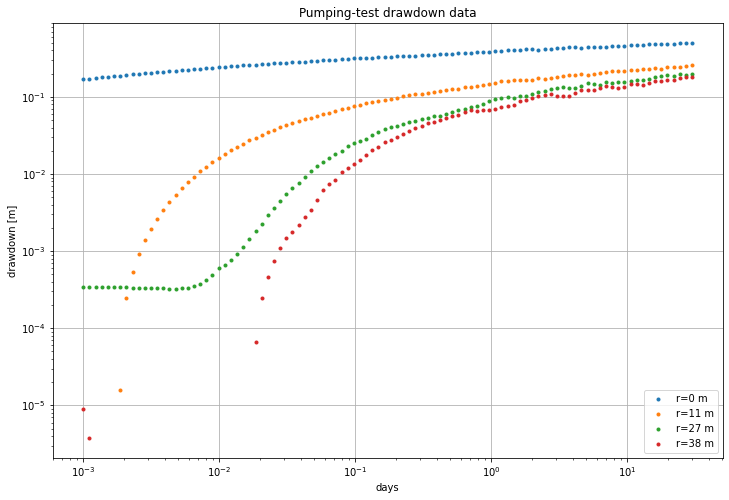

In [4]:
ax1 = newfig("Pumping-test drawdown data", "days", "drawdown [m]", xscale='linear')
ax2 = newfig("Pumping-test drawdown data", "days", "drawdown [m]", xscale='log')
ax3 = newfig("Pumping-test drawdown data", "days", "drawdown [m]", xscale='log', yscale='log')

for ax in [ax1, ax2, ax3]:
    for col in pdata.columns:
        ax.plot(times, pdata[col], '.', label=col)
    ax.legend()

## Plot of drawdown versus $t/r^2$ instead of versus $t$

Plot the data again, but now not versus real time but versus $t/r^2$, where $r$ is the distance from the center of the pumping well to the piezometer (observation well).

According to the theory, the drawdown data of all piezometers should fall on the same line.

We invert the linear y-axes in to show the head is actually going down.

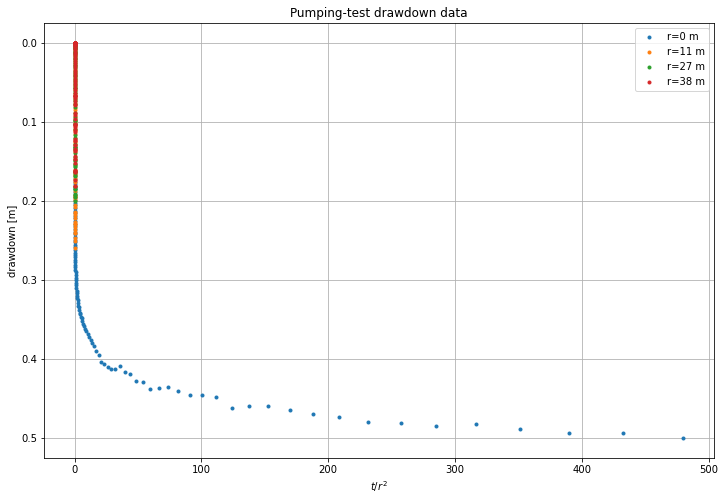

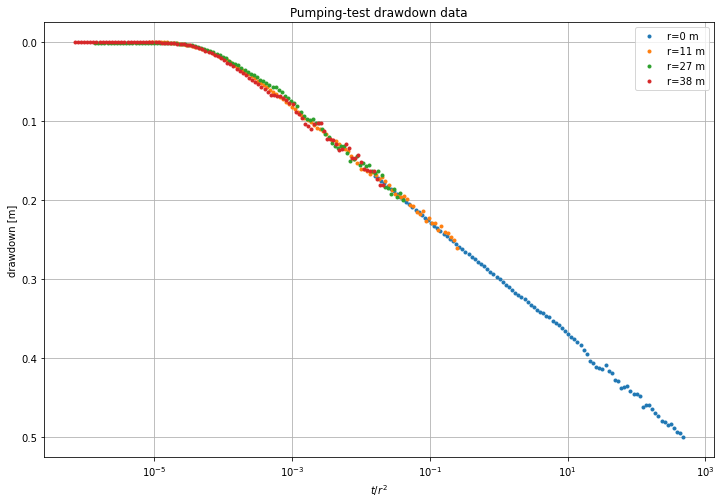

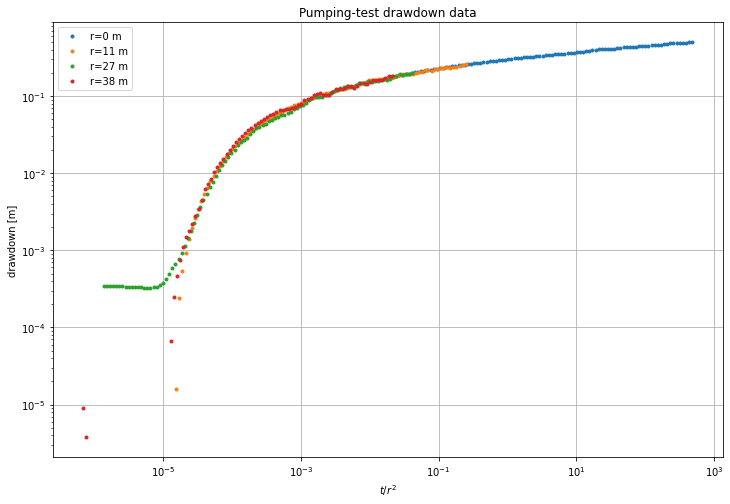

In [5]:
ax1 = newfig("Pumping-test drawdown data", r"$t/r^2$", "drawdown [m]", xscale='linear')
ax2 = newfig("Pumping-test drawdown data", r"$t/r^2$", "drawdown [m]", xscale='log')
ax3 = newfig("Pumping-test drawdown data", r"$t/r^2$", "drawdown [m]", xscale='log', yscale='log')

ax1.invert_yaxis()
ax2.invert_yaxis()

for ax in [ax1, ax2, ax3]:
    for col, r in zip(pdata.columns, r_pz):
        ax.plot(times / r ** 2, pdata[col], '.', label=col)
    ax.legend()

## Our data on versus $\log(t)$

To compute the transmissivity, we only need the drawdown per log cycle from any one observation well. The only condition is that the drawdown per logcycle is taken along the part of the curve where it has become strictly a straight line on the graph with $\log(t)$ as *x*-axis.
We can just plot a straigh line along one of the measured rawdown lines and adapt the parameters until the straight line fits the straight part of the measured drawdown.

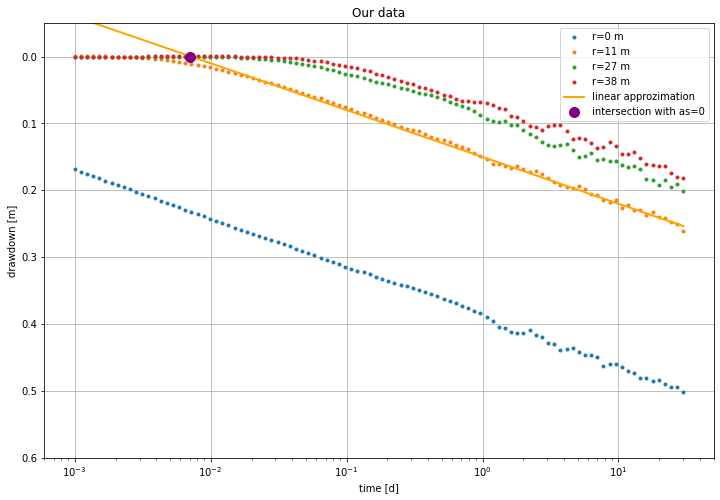

In [6]:
ax = newfig("Our data", "time [d]", "drawdown [m]", xscale='log', ylim=(0.6, -0.05))

# The straight line's parameters
y0 = 0.15
a = 0.07     # drawdown per log cycle
y = y0 + a * np.log10(times)

# The intersection point where the straight line intersects zero drawdown.
s0 = 0 # m
ts = 7e-3 # d

for col in pdata.columns:
    plt.plot(times, pdata[col], '.', label=col)
    
ax.plot(times, y, lw=2, color='orange', label='linear approzimation')
ax.plot(ts, s0, 'o', ms=10, color='purple', label='intersection with as=0')
ax.legend()

Then, from the dawdowon per log-cycle (a = 0.07 m, see yellow line in figure) we have:

$$s_{10t} - s_t = \frac{Q}{4 \pi kD} \log(10) \rightarrow
kD = \frac{2.3 Q}{4 \pi \left(s_{10t} - s_t\right)} \log(10) 
\approx \frac{2.3 \, Q}{4 \pi \left(s_{10t} - s_t\right)} $$

And then from the time when the straight line intersects $s = 0$, we get the storage coefficient:

$$s \approx \frac{Q}{4 \pi kD} \ln\left(\frac{2.25 kD t}{r^2 S}\right) \rightarrow \frac{2.25 kD t}{r^2 S} = 1 \rightarrow S = \frac{2.25 kD t_{s=0}}{r^2} $$

In [7]:
Q = 600 # m3/d
kD = 2.3 * Q / (4 * np.pi * a)
S = 2.25 * kD * ts / 11 ** 2

print(f'kD = {kD:.4g}, S={S:.2g}')

kD = 1569, S=0.2


## Define the three wells and compute the dd at one point as a function of time

In [8]:
# Dictionary of wells

wells = {1 : {'x': 0, 'y': -500, 'Q': 2400},
         2 : {'x': 0, 'y':    0, 'Q': 2400},
         3 : {'x': 0, 'y': +500, 'Q': 2400}}

If we neglect the presence of the river and the impervious mountain for now, we can compute the drawdown according to Theis at an abitrary locaton for each and all of the wells; the latter by superposition.

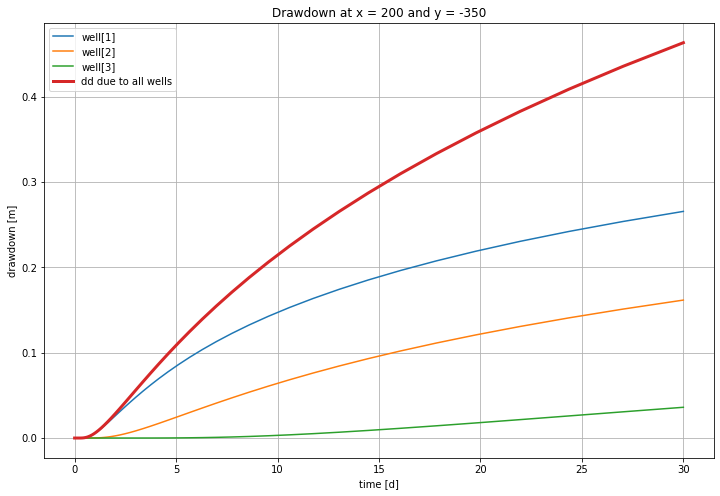

In [9]:
x, y = 200., -350. # arbitrary point

ax = newfig(f"Drawdown at x = {x:.0f} and y = {y:.0f}", "time [d]", 'drawdown [m]')

s_total = np.zeros_like(times)

for k in wells:
    well = wells[k]
    r = np.sqrt((x - well['x']) ** 2 + (y - well['y']) ** 2)
    u = r ** 2 * S / (4 * kD * times)
    s = well['Q'] / (4 * np.pi * kD) * W(u) # W is the exponential integral see imports.
    ax.plot(times, s, label=f'well[{k:}]')
    
    #s_total = s_total + s
    s_total += s

plt.plot(times, s_total, lw=3, label='dd due to all wells')
    
plt.legend()

## Drawdown along a lines parallel to the axis of the valley (y-axis) for different times

Again for now, neglect the river and the impervious wall for this demonstration.

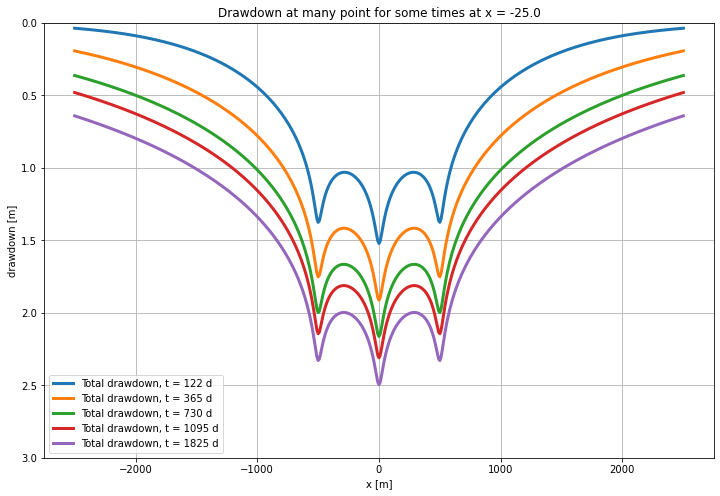

In [10]:
show_times = np.array([1/3, 1, 2, 3, 5]) * 365

x = -25 # line not exactly through the wells.

Y = np.linspace(-2500, 2500, 501)
X = np.zeros_like(Y) + x

ax = newfig(f"Drawdown at many point for some times at x = {x:.1f}", "x [m]", 'drawdown [m]', ylim=(3, 0))

for t in show_times:
    s_total = np.zeros_like(X)
          
    for key in wells:
        well = wells[key]
        r = np.sqrt((X - well['x']) ** 2 + (Y - well['y']) ** 2)
        u = r ** 2 * S / (4 * kD * t)
        s = well['Q'] / (4 * np.pi * kD) * W(u)

        #s_total = s_total + s # superpositioin
        s_total += s

    ax.plot(Y, s_total, lw=3, label='Total drawdown, t = {:.0f} d'.format(t))
    
ax.legend()
plt.show()

## To compute the drawdown we need to mirror the well in the center of the valley with respect to be the river on the left and the closed side at the right


### Continue with just one well, at the center of the three of which the extraction is the sum. This is ok, because the datails of the three invidual wells don't matter at larger distances. (The valley is 5 km wide, and the distance between the wells was only 500 m).

![afbeelding.png](../pictures/AssJan2021_2.png)
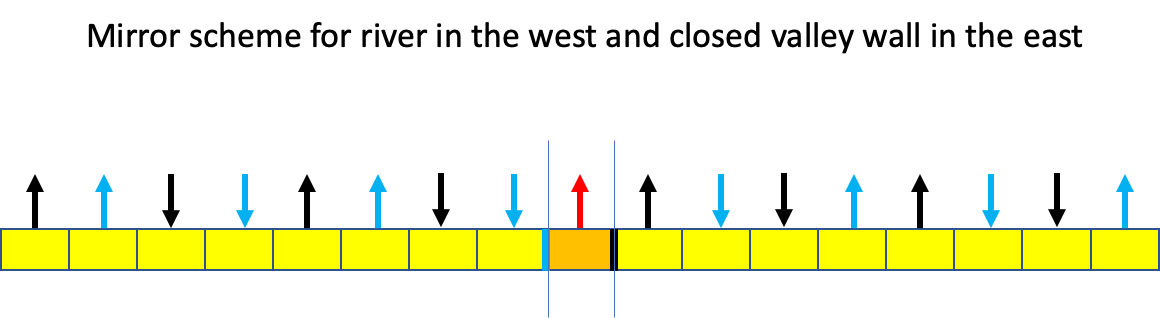

In [11]:
# The data
Q = 0
for k in wells:
    Q += wells[k]['Q'] # m3/d, production dischage. Is the combined extractioin of the three wells.
kD = 1570    # m2/d, from  the pumping test
S = 0.2      # [-], from the pumping test.
L = 5000     # m, valley width
y = 10       # m, location of line parallel to x-axis. We can change this later.

X = np.linspace(-L/2, L/2, 501) # m, Sufficient number of points along x-axis
Y = np.zeros_like(X) + y        # y, y-coordinates for the line parallel to the x-axis,

show_times = np.array([1/3, 1, 2, 3, 4, 5]) * 365 # in days, the times for which we want the drawdown or head.

To comopute the drawdowns, we must use mirror well, in fact an infinite number of them.
In practice, set n to a number, for example 20, and later on check that increasing this number does not change the outcome.
# We place mirror wells in na loop, and add their results together.

First inspect the required superposition scheme

![Superposition scheme](../pictures/AssJan2021_3.png)


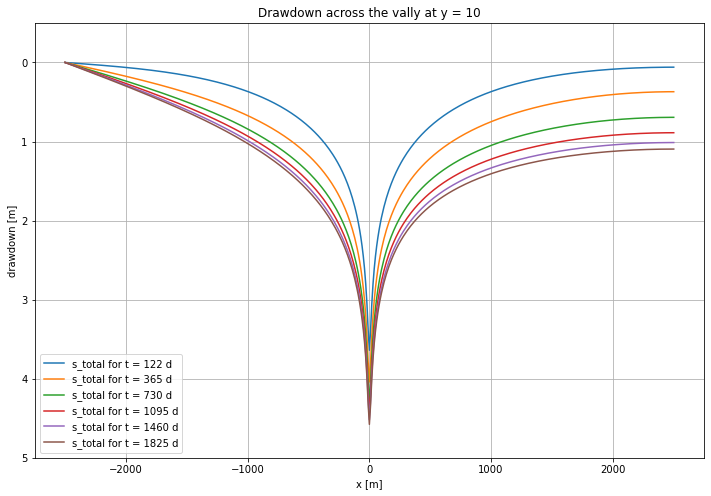

In [12]:
ax = newfig(f"Drawdown across the vally at y = {y:.0f}", "x [m]", "drawdown [m]", ylim=(5, -0.5))

for t in show_times:
    xw = 0
    r2 = (xw - X) ** 2 + Y ** 2
    u = r2 * S / (4 * kD * t)    
    s_total = Q / (4 * np.pi * kD) * W(u) # This is the well in the center
    
    # Add to this 4 times 20 mirror wells:
    for n in range(1, 20): # in total 20 mirror wells
        # Blue wells (west) in the scheme
        xwn = -(2 * n -1) * L
        r2 = (xwn - X) ** 2 + Y ** 2
        u = r2 * S / (4 * kD * t)    
        Qn = (-1) ** n * Q
        s = Qn / (4 * np.pi * kD) * W(u)
        s_total += s

        # Black wells (west) of the scheme
        xwn = -2 * n * L
        r2 = (xwn - X) ** 2 + Y ** 2
        u = r2 * S / (4 * kD * t)    
        Qn = (-1) ** n * Q
        s = Qn / (4 * np.pi * kD) * W(u)
        s_total += s

        # Black wells (east) of the scheme
        xwn = (2 * n -1) * L
        r2 = (xwn - X) ** 2 + Y ** 2
        u = r2 * S / (4 * kD * t)    
        Qn = (-1) ** (n - 1) * Q
        s = Qn / (4 * np.pi * kD) * W(u)
        s_total += s

        # Blue well (east) of the scheme
        xwn = 2 * n * L
        r2 = (xwn - X) ** 2 + Y ** 2
        u = r2 * S / (4 * kD * t)    
        Qn = (-1) ** n * Q
        s = Qn / (4 * np.pi * kD) * W(u)
        s_total += s
    #print(s_total)
    ax.plot(X, s_total, label=f"s_total for t = {t:.0f} d")
plt.legend()
plt.show()

## These results show the correct behavior:

1. Zero drawdown at the river.
2. Zero flux at the impervious valley wall.

## What is the influx from the river into the aquifer?

We start with the total discharge caused by a well across a circle with radius r around this well.
 
 $$ Q_r = Q_o e^{-u} $$
 
 The specific discharge $q_r$, therefore, is
 
 $$ q_r = \frac{Q_o e^{-u}}{2 \pi r} $$
 
 and the component in $x$-direction, therefore, equals
 
 $$ q_x = \frac{Q_o e^{-u}}{2 \pi} \frac{x}{r^2}$$
 
 We can verify the total flow at least for the steady sate case, by integrating this component along the $y$-axes at an $x$ for that case that $ \exp(-u) = 1 $
 
 $$ Q_x = \frac{Q_o}{2 \pi} \intop_{-\infty}^{\infty} \frac  {x}{x^2 + y^2} dy$$
 
 $$ Q_x = \frac{Q_0}{2 \pi} \left. \arctan \frac y x \right|_{y = -\infty}^{y = +\infty}$$
 
 $$ Q_x = \frac {Q_o} 2 $$
 
Wihch is correct fro a steady-stage situation, but not for the transient case. The transient inflow will be local at first, but spreads to the north and south along the river as time increases.

We can use the analytical inflow just derived to estimate how long a strech along the river we should consider to at least have 90% of the water infiltrating in the steady state.

## Implement the flow across the midline between a well and its opposite mirror to simulate a river or canal.

Sw we have two wells, defined below in a dictionary `wells`.

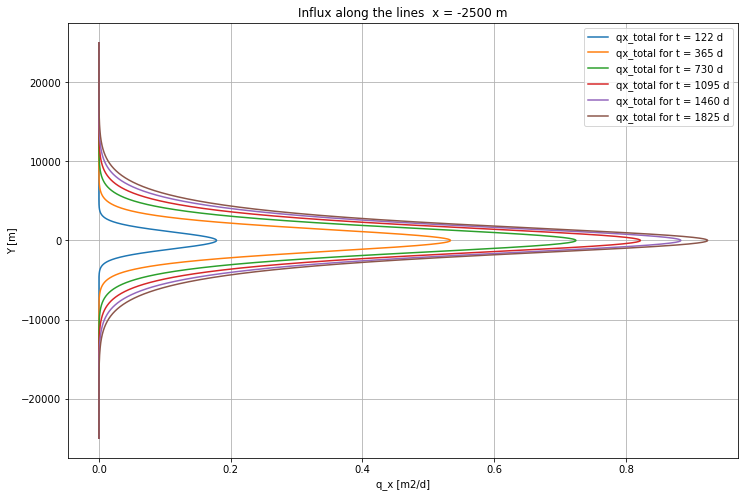

In [13]:
Q = 0
for k in wells:
    Q += wells[k]['Q'] # m3/d, production dischage. Is the combined extractioin of the three wells.
kD, S = 1570,  0.2 # from pumping test
L = 5000
x = -L / 2 # location of the river relative to the heart line of the valley.

# River points
m = 5
Y = np.linspace(-m * L, m * L, int(m * L / 10)) # y-coordinates along the river.
X = np.zeros_like(Y) + x # the x-coordinates. All the same. We can change the location of the vertical  line by changing x.

show_times = np.array([1/3, 1, 2, 3, 4, 5]) * 365

dy = np.diff(Y)

ax = newfig(f"Influx along the lines  x = {x:.0f} m", "q_x [m2/d]", "Y [m]")

for t in show_times:
    xw = 0
    r2 = (xw - X) ** 2 + Y ** 2
    u = r2 * S / (4 * kD * t)    
    qx_total = Q / (2 * np.pi) * np.exp(-u) * (xw - X) / r2
    
    # Add to this 4 times 20 mirror wells:
    for n in range(1, 20): # in total 20 mirror wells
        # Blue wells (west) in the scheme
        xwn = -(2 * n -1) * L
        r2 = (xwn - X) ** 2 + Y ** 2
        u = r2 * S / (4 * kD * t)    
        Qn = (-1) ** n * Q
        qx = Qn / (2 * np.pi) * np.exp(-u) * (xwn - X) / r2
        qx_total += qx

        # Black wells (west) of the scheme
        xwn = -2 * n * L
        r2 = (xwn - X) ** 2 + Y ** 2
        u = r2 * S / (4 * kD * t)    
        Qn = (-1) ** n * Q
        qx = Qn / (2 * np.pi) * np.exp(-u) * (xwn - X) / r2
        qx_total += qx

        # Black wells (east) of the scheme
        xwn = (2 * n -1) * L
        r2 = (xwn - X) ** 2 + Y ** 2
        u = r2 * S / (4 * kD * t)    
        Qn = (-1) ** (n - 1) * Q
        qx = Qn / (2 * np.pi) * np.exp(-u) * (xwn - X) / r2
        qx_total += qx

        # Blue well (east) of the scheme
        xwn = 2 * n * L
        r2 = (xwn - X) ** 2 + Y ** 2
        u = r2 * S / (4 * kD * t)    
        Qn = (-1) ** n * Q
        qx = Qn / (2 * np.pi) * np.exp(-u) * (xwn - X) / r2
        qx_total += qx
    #print(s_total)
    ax.plot(qx_total, Y, label=f"qx_total for t = {t:.0f} d")
    ax.legend()
    plt.show()

## The inflow as a function of time (to prove that it will approach the extraction from the well)

This is exactly the same code as before. Only we now accumulate the total discharge in an array that we can show later.

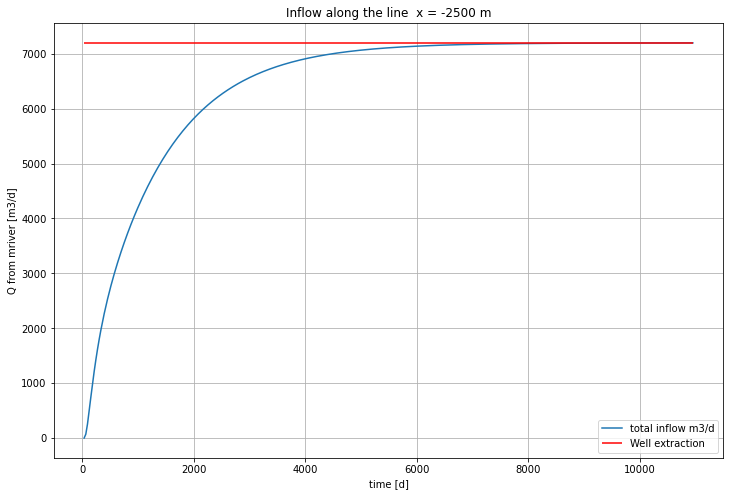

In [14]:
Q = 0
for k in wells:
    Q += wells[k]['Q'] # m3/d, production dischage. Is the combined extractioin of the three wells.
kD, S = 1570,  0.2 # from pumping test
L = 5000
x = -L / 2 # location of the river relative to the heart line of the valley.

run_times = np.arange(0, 30 * 365.24, 30)[1:]

# River points
m = 5
Y = np.linspace(-m * L, m * L, int(m * L / 10)) # y-coordinates along the river.
X = np.zeros_like(Y) + x # the x-coordinates. All the same. We can change the location of the vertical  line by changing x.

dy = np.diff(Y)

# Totale inflow from the river
Qriver = np.zeros(len(run_times))

for it, t in enumerate(run_times):
    xw = 0
    r2 = (xw - X) ** 2 + Y ** 2
    u = r2 * S / (4 * kD * t)    
    qx_total = Q / (2 * np.pi) * np.exp(-u) * (xw - X) / r2
    
    # Add to this 4 times 20 mirror wells:
    for n in range(1, 20): # in total 20 mirror wells
        # Blue wells (west) in the scheme
        xwn = -(2 * n -1) * L
        r2 = (xwn - X) ** 2 + Y ** 2
        u = r2 * S / (4 * kD * t)    
        Qn = (-1) ** n * Q
        qx = Qn / (2 * np.pi) * np.exp(-u) * (xwn - X) / r2
        qx_total += qx

        # Black wells (west) of the scheme
        xwn = -2 * n * L
        r2 = (xwn - X) ** 2 + Y ** 2
        u = r2 * S / (4 * kD * t)    
        Qn = (-1) ** n * Q
        qx = Qn / (2 * np.pi) * np.exp(-u) * (xwn - X) / r2
        qx_total += qx

        # Black wells (east) of the scheme
        xwn = (2 * n -1) * L
        r2 = (xwn - X) ** 2 + Y ** 2
        u = r2 * S / (4 * kD * t)    
        Qn = (-1) ** (n - 1) * Q
        qx = Qn / (2 * np.pi) * np.exp(-u) * (xwn - X) / r2
        qx_total += qx

        # Blue well (east) of the scheme
        xwn = 2 * n * L
        r2 = (xwn - X) ** 2 + Y ** 2
        u = r2 * S / (4 * kD * t)    
        Qn = (-1) ** n * Q
        qx = Qn / (2 * np.pi) * np.exp(-u) * (xwn - X) / r2
        qx_total += qx
        
    # Integrate along the river
    Qriver[it] = np.sum(0.5 * (qx_total[:-1] + qx_total[1:]) * dy)
    #print(s_total)

ax = newfig(f"Inflow along the line  x = {x:.0f} m", "time [d]", "Q from mriver [m3/d]")
ax.plot(run_times, Qriver, label="total inflow m3/d")
ax.hlines(Q, run_times[0], run_times[-1], color='r', label='Well extraction')
ax.legend(loc='lower right')
plt.show()

## Verfication of the mirroring scheme using cross section of drawdown and specific discharge

 Maps of the drawdown and of the flow vectors and a streamplot computed from the flow vectors are also shown.

<a list of 12 text.Text objects>

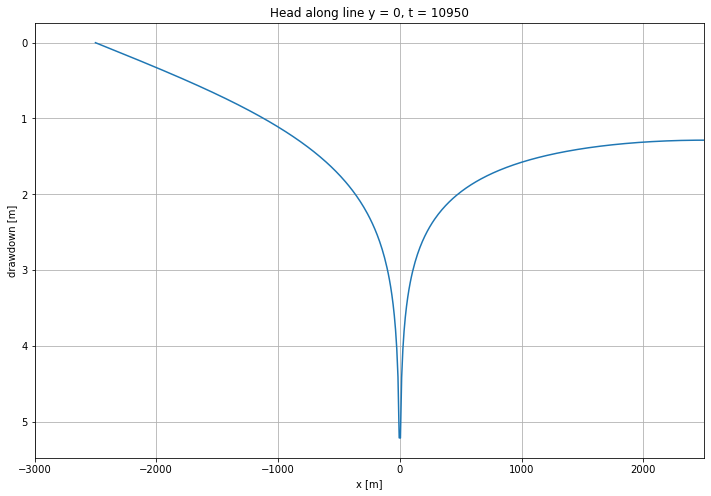

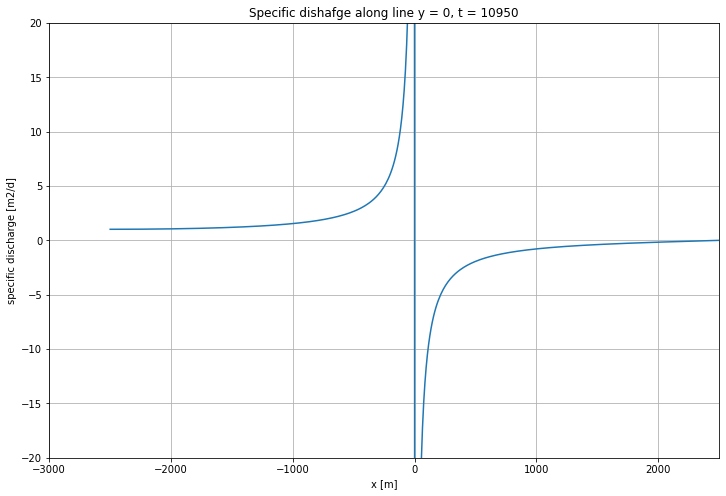

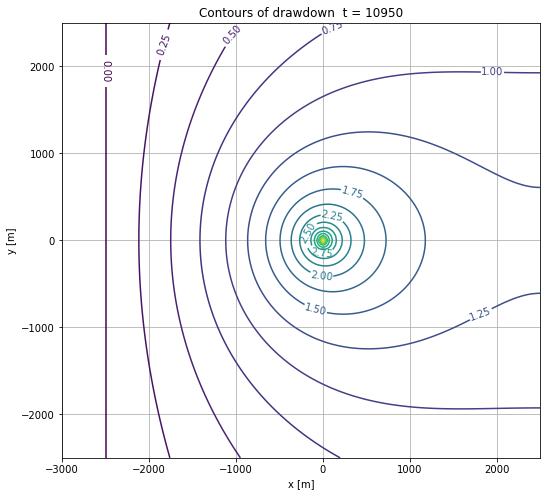

In [15]:
Q = 0
for k in wells:
    Q += wells[k]['Q'] # m3/d, production dischage. Is the combined extractioin of the three wells.
kD = 1570
S = 0.2
L = 5000
x = - L / 2

m = 1
Y_ = np.linspace(- m * L/2, m * L/2, int(m * L / 50) + 1)
X = np.zeros_like(X) + x
X_ = np.linspace(-0.5 * L, 0.5 * L, 500)
X, Y = np.meshgrid(X_, Y_)

for t in run_times[-1:]:
    xwn = 0.
    r2 = (X - xwn) ** 2 + Y ** 2
    u = r2 * S / (4 * kD * t)
    s_total = Q / (4 * np.pi * kD) * W(u)
    qx_total = Q * np.exp(-u) / (2 * np.pi) * (xwn - X) / r2
    qy_total = Q * np.exp(-u) / (2 * np.pi) * Y / r2
    for n in range(1, 20):
            # Blue wells left
            xwn = -(2 * n -1) * L
            r2 = (X - xwn) ** 2 + Y ** 2
            u = r2 * S / (4 * kD * t)
            Qn = (-1) ** n * Q
            s = Qn  / (4 * np.pi * kD) * W(u)
            qx = Qn * np.exp(-u) / (2 * np.pi) * (xwn - X) / r2
            qy = Qn * np.exp(-u) / (2 * np.pi) * Y   / r2
            s_total  += s
            qy_total += qy
            qx_total += qx

            # Black wells left
            xwn = -2 * n * L
            r2 = (X - xwn) ** 2 + Y ** 2
            u = r2 * S / (4 * kD * t)
            Qn = (-1) ** n * Q
            s = Qn  / (4 * np.pi * kD) * W(u)
            qx = Qn * np.exp(-u) / (2 * np.pi) * (xwn - X) / r2
            qy = Qn * np.exp(-u) / (2 * np.pi) * Y   / r2
            s_total  += s
            qy_total += qy
            qx_total += qx

            # Black wells east
            xwn = (2 * n -1) * L
            r2 = (X - xwn) ** 2 + Y ** 2
            u = r2 * S / (4 * kD * t)
            Qn = (-1) ** (n - 1) * Q
            s = Qn  / (4 * np.pi * kD) * W(u)
            qx = Qn * np.exp(-u) / (2 * np.pi) * (xwn - X) / r2
            qy = Qn * np.exp(-u) / (2 * np.pi) * Y   / r2
            s_total  += s
            qy_total += qy
            qx_total += qx

            # Blue well east
            xwn = 2 * n * L
            r2 = (X - xwn) ** 2 + Y ** 2
            u = r2 * S / (4 * kD * t)
            Qn = (-1) ** n * Q
            s = Qn  / (4 * np.pi * kD) * W(u)
            qx = Qn * np.exp(-u) / (2 * np.pi) * (xwn - X) / r2
            qy = Qn * np.exp(-u) / (2 * np.pi) * Y   / r2
            s_total  += s
            qy_total += qy
            qx_total += qx
    #print(s_total)

 
# Plot head along x at given y

y0 = 0
iy = np.where(Y[:, 0] <= y0)[0][-1]
y0 = Y[iy, 0]

xlim = (X[0,0] - 500., X[0, -1])

ax = newfig(f"Head along line y = {y0:.0f}, t = {t:.0f}", "x [m]", "drawdown [m]", xlim=xlim)
ax.invert_yaxis()
ax.plot(X[iy], s_total[iy], label='y={:.0f}'.format(y0))

# Horizontal specific discharge along x-axis at give y
ax = newfig(f"Specific dishafge along line y = {y0:.0f}, t = {t:.0f}", "x [m]", "specific discharge [m2/d]", xlim=xlim, ylim=(-20, 20))
ax.plot(X[iy], qx_total[iy], label='y={:.0f}'.format(y0))

ax = newfig(f"Contours of drawdown  t = {t:.0f}", "x [m]", "y [m]", xlim=xlim)
ax.set_aspect(1.)
cs = ax.contour(X, Y, s_total, levels=20)
ax.clabel(cs)
plt.show()

As one sees, the specific discharge is zero at the impervious wall at x=2500 and the head is zero at x=2500 the river. This is also nicely shown by the contourlines, where at x=0 the head is a straight line that coincides with the river.

### Below is a streamplot and quiver based on the specific discharge vectors, but they are inaccurate when there are singularities like wells in the flowfied.

Below, the field with the specific discharge values is used to generate a quiver (field with vectors) and streamplot (stream lines). But these are inaccurate around singularities like wells, especially injection well. Here we had to change the sign of the vector values to make the arrows point in the right direction. The latter makes sens as an extraction would logially be a negative flow with respect to the grounwater system. This a matter of convention, or, if you like, of choice by the modeler.

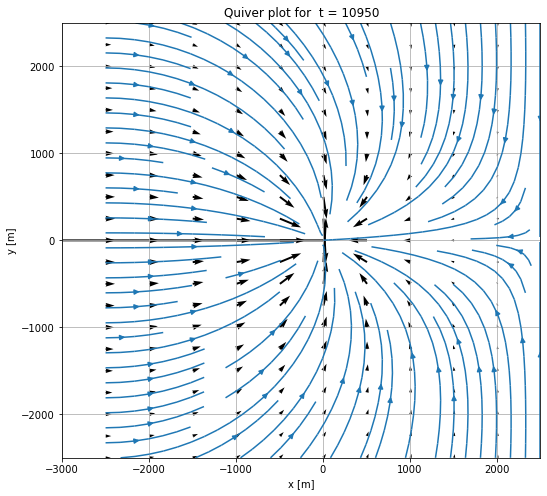

In [16]:
ax = newfig(f"Quiver plot for  t = {t:.0f}", "x [m]", "y [m]", xlim=xlim)
ax.set_aspect(1.)

nix, niy = 50, 5 #interlaser
ax.quiver(X[::niy, ::nix], Y[::niy, ::nix], qx_total[::niy, ::nix], -qy_total[::niy, ::nix])
ax.streamplot(X[0], Y[:, 0], qx_total, -qy_total)
plt.show()

## Required depth of the well screens

As can be seen of the previous graph showing the development of the inflow from the river with time, it takes about 8000 days to reach full equilibrium. Se we can just make a graph showing the drawdown at a distacne $r_0$ from the center wel, where $r_0$ is the well-bore radius. This yields the theoretically largest drawdown. In practice, we must add to compensate for different facts that will cause a larger drawdown. These are:

1. Partial penetration of the well screen in the aquifer (screen length < aquifer thickness)
2. Clogging of the well bore and well screen during by suboptimal development of the well (remaining drilling fluid on borehole wall)
3. Clogging over time due to the extraction itself, caused by particles from the aquifer and chemical and biological processes.
4. Clogging of the river bed over time due to the forced infiltration caused by the pumping.
5. Operational fluctuations and possible future increase of the flow rate or due to installation of more wells to increase the capapcity of the pumping station.
6. Droughts that couse extra lowerings of the water table and of the river water level.
7. Compatitive extraction from the groudnwater, causing lower water tables in the future.
8. Compatitive extraction from the river causing lower river water levels. The river might even run completely dry at times due to riverrain and groundwater extractions.
9. Perhaps some more factors.
Most of the factors considered above may have to be guessed or estimated with insufficient information. Clearly, there may be serioous sustainability issues to be addressed and assessed.

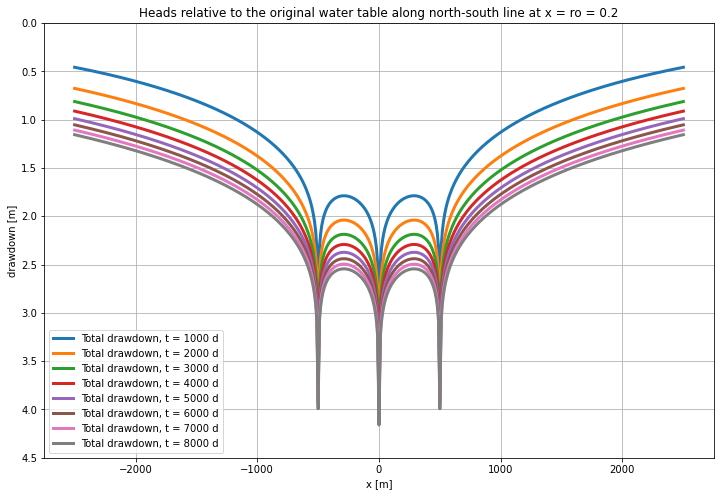

In [17]:
show_times = np.array([1/3, 1, 2, 3, 5]) * 365

r0 = 0.25 # m, Well screen radius
x = r0 # line not exactly through the wells.

Y = np.linspace(-2500, 2500, 501)
X = np.zeros_like(Y) + x

ax = newfig(f"Heads relative to the original water table along north-south line at x = ro = {x:.1f}", "x [m]", 'drawdown [m]', ylim=(4.5, 0))

show_times = np.array([1, 2, 3, 4,5 , 6, 7, 8]) * 1000.

for t in show_times:
    s_total = np.zeros_like(X)
          
    for key in wells:
        well = wells[key]
        r = np.sqrt((X - well['x']) ** 2 + (Y - well['y']) ** 2)
        u = r ** 2 * S / (4 * kD * t)
        s = well['Q'] / (4 * np.pi * kD) * W(u)

        #s_total = s_total + s # superpositioin
        s_total += s

    ax.plot(Y, s_total, lw=3, label=f'Total drawdown, t = {t:.0f} d')
    
ax.legend()
plt.show()


## Conclusion

We answered more questions than asked to get a clear picture of the situation.

The most difficult part was, perhaps, the spatial superposition, due to the mirroring of the well around both the river and the impervious valley well. But with a clear visual superposition screen, the geneation of the sign and the position of the mirror wells was relatively straight forward. After that, all wells, mirror wells or not, are just ordinary wells as far as the the computations are concerned.